## Machine Learning 
Msc Finance & Big Data
11 Avril 2020 14h

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

### Import Data

In [2]:
df = pd.read_csv(r'IMDB-Dataset.csv')

### Check Data

In [3]:
#Check first movie review 
df.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [4]:
all_text = ' '.join([text for text in df['review']])
print('Number of words in all_text:', len(all_text))

Number of words in all_text: 64308691


### Transform the text reviews columns into vectorized word counts

In [5]:
count_vectorizer = CountVectorizer(stop_words='english', min_df=20)
counts = count_vectorizer.fit_transform(df['review']) 

#Count the occurence for each words selected in count_vectorizer
word_index_map = count_vectorizer.vocabulary_

#See the 10 most used word
dict(list(word_index_map.items())[0:10])

{'reviewers': 13140,
 'mentioned': 9934,
 'watching': 17110,
 'just': 8702,
 'oz': 11154,
 'episode': 5464,
 'll': 9310,
 'hooked': 7639,
 'right': 13231,
 'exactly': 5599}

In [6]:
# See part of the defined stop_words
print("There is {} stop words".format(len(count_vectorizer.stop_words_)))
count_vectorizer.stop_words_

There is 86168 stop words


{'raisuli',
 'arzner',
 'cipriani',
 'wendi',
 'castthe',
 'shuddering',
 'castrati',
 'shatta',
 'considine',
 'wetbacks',
 'zchaundi',
 'sivana',
 'incommunicability',
 'mirna',
 'perdita',
 'herron',
 'shera',
 'beyblade',
 'mobius',
 'towsend',
 'traffik',
 'hijixn',
 'wiotch',
 'reedy',
 'nomolos',
 'brattiness',
 'schenke',
 'inmy',
 'triadic',
 'artistes',
 'controled',
 'marais',
 'policewomen',
 'eccchhh',
 'awaaaaay',
 'visualizes',
 'seqence',
 'loosest',
 'sinker',
 'schilling',
 '1901',
 'mappin',
 'tustin',
 'tna',
 'darkon',
 'indulgant',
 'nowt',
 'titillatingly',
 'dheeraj',
 'pageantry',
 'colonne',
 'heartwretching',
 'mumtaz',
 'ramming',
 'evaluates',
 'sciamma',
 'honogurai',
 'renauld',
 'bedhopper',
 'kittiwake',
 'snottiest',
 'olajima',
 'scourge',
 'backers',
 'farrellys',
 'parley',
 'flinstones',
 'toking',
 'totoro',
 'potentiality',
 'morsheba',
 'mattresses',
 'ballgame',
 'kinfolk',
 'robed',
 'aprea',
 'thrumming',
 'accordion',
 'bfg',
 'colins',
 'co

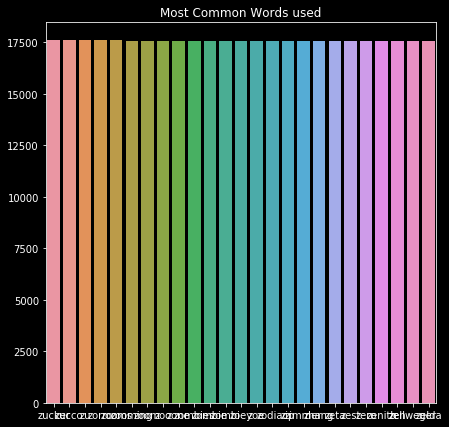

In [7]:
#Understand the data, check the mosted used word in the reviews

eap_counts = Counter(word_index_map)
eap_common_words = [word[0] for word in eap_counts.most_common(25)]
eap_common_counts = [word[1] for word in eap_counts.most_common(25)]

plt.style.use('dark_background')
plt.figure(figsize=(7, 7))

sns.barplot(x=eap_common_words, y=eap_common_counts)
plt.title('Most Common Words used')
plt.show()

### Format sentiment entries to one-hot format: 0 => [1,0] and 1 => [0,1]

In [8]:
y = np.array(tf.keras.utils.to_categorical(
    df['sentiment'], num_classes=None, dtype='float32'
))
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [9]:
#Get the shape of the sparse matrix
counts.shape

(50000, 17599)

### Split the dataset into a training and an evaluation set
80% first rows for training and the 20% remaining for evaluation

In [10]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(counts.toarray(), y, test_size = 0.2,
                                                    random_state = 0, shuffle= False)

### Neural network which take words counts as inputs and has two outputs
The first output is the negative sentiment score, and the second output is the positive sentiment score

In [11]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

In [12]:
def create_mlp_model(input_size,size_layer1, size_layer2, num_classes):
    
    model = tf.keras.Sequential()
    
    model.add(Dense(size_layer1, input_shape=(input_size,), activation='relu'))  
    model.add(Dense(size_layer2, activation='relu'))  
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [13]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

#CNN
def create_cnn_model(input_shape, nb_filters1, nb_filters2, size_dense1, num_classes):
    
    model = tf.keras.Sequential()
    
    model.add(Conv2D(nb_filters1, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    
    model.add(Conv2D(nb_filters2, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    
    model.add(Flatten())
    
    model.add(Dense(size_dense1, activation='relu'))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    return model


In [14]:
input_size = 1 * len(counts.toarray()[0])

num_classes = 2
#Reshape data
X_train = X_train.reshape(X_train.shape[0], input_size)
X_test = X_test.reshape(X_test.shape[0], input_size)

### Train and evaluate the model

In [15]:
size_layer1 = 512
size_layer2 = 256

model = create_mlp_model(input_size,size_layer1, size_layer2, num_classes)
model.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate=0.001), metrics=['acc'])
history=model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/10
400/400 [==============================] - 32s 80ms/step - loss: 0.3102 - acc: 0.8725 - val_loss: 0.2661 - val_acc: 0.8926
Epoch 2/10
400/400 [==============================] - 33s 82ms/step - loss: 0.1008 - acc: 0.9631 - val_loss: 0.3345 - val_acc: 0.8844
Epoch 3/10
400/400 [==============================] - 31s 77ms/step - loss: 0.0156 - acc: 0.9954 - val_loss: 0.6088 - val_acc: 0.8888
Epoch 4/10
400/400 [==============================] - 32s 81ms/step - loss: 0.0052 - acc: 0.9988 - val_loss: 0.7647 - val_acc: 0.8871
Epoch 5/10
400/400 [==============================] - 35s 88ms/step - loss: 0.0056 - acc: 0.9986 - val_loss: 0.7433 - val_acc: 0.8829
Epoch 6/10
400/400 [==============================] - 37s 92ms/step - loss: 0.0071 - acc: 0.9980 - val_loss: 0.7944 - val_acc: 0.8837
Epoch 7/10
400/400 [==============================] - 34s 84ms/step - loss: 0.0057 - acc: 0.9984 - val_loss: 0.8177 - val_acc: 0.8821
Epoch 8/10
400/400 [==============================] - 31s 78ms

In [16]:
y_pred = model.predict(X_test)

pred_classes = np.argmax(y_pred,axis=1)

true_classes =  np.argmax(y_test,axis=1)

test_acc = 100*np.sum(pred_classes==true_classes)/len(true_classes)

print("Test accuracy {}%".format(test_acc))

Test accuracy 88.01%


### The goal of the remaining is to visualize which word supporting positive ratings
We are going to use the vocabulary_ attribute of CountVectorizer class and attribute vocabulary_ maps words to their indices in word count vectors.
The prediction  contain for each word the negativity and the positivity scores

In [17]:
matrix = np.eye(len(count_vectorizer.vocabulary_))
y_pred_matrix = model.predict(matrix)
y_pred_matrix

array([[4.3031879e-02, 9.5696807e-01],
       [2.5842550e-01, 7.4157453e-01],
       [1.7763858e-01, 8.2236141e-01],
       ...,
       [1.7680035e-03, 9.9823207e-01],
       [9.9988902e-01, 1.1098138e-04],
       [1.8932436e-01, 8.1067562e-01]], dtype=float32)

### Display the word-cloud of each word associating to their positif/negatif scores /occurence

In [18]:
negative_score = y_pred_matrix[:,0]
positive_score = y_pred_matrix[:,1]

#### Words clouds for all the words based on their negative score

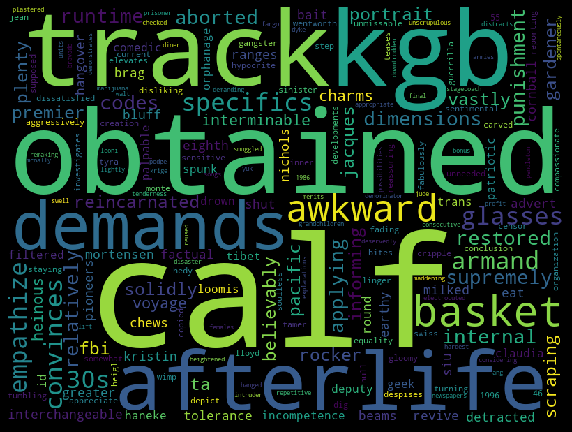

In [19]:
count_sum = np.sum(counts,axis=0)

word_counts = {}
count = 0
for word in word_index_map.keys():
    word_counts[word] = negative_score[count]
    count = count +1
    
wordcloud = WordCloud(width=800, height=600, relative_scaling=0.5).generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Words clouds for all the words based on their positive score

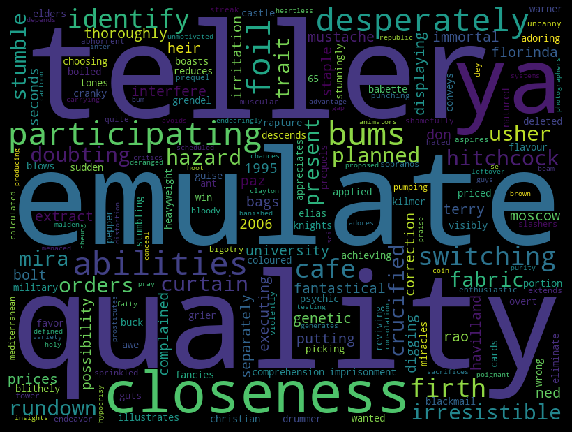

In [20]:
count_sum = np.sum(counts,axis=0)

word_counts = {}
count = 0
for word in word_index_map.keys():
    word_counts[word] = positive_score[count]
    count = count +1
    
wordcloud = WordCloud(width=800, height=600, relative_scaling=0.5).generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Words clouds for all the words based on their occurence

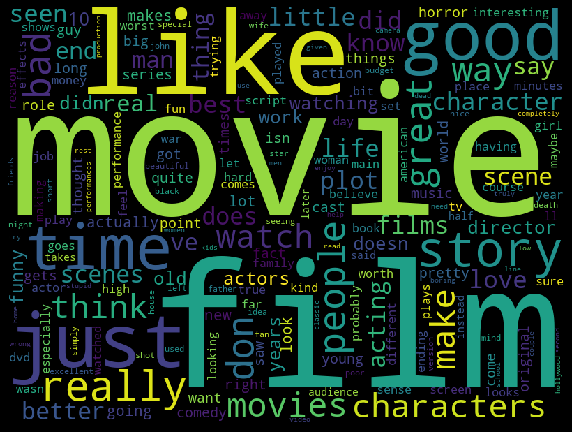

In [21]:
count_sum = np.sum(counts,axis=0)

word_counts = {}

for word in word_index_map:
    index = word_index_map[word]
    word_counts[word] = count_sum[0,index]
    
wordcloud = WordCloud(width=800, height=600, relative_scaling=0.5).generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()